# CS51 Assignment 2: Algorithms and Simulation


This assignment has two distinct parts in addition to a reflection: Part 1 requires you to apply your knowledge of algorithmic thinking and optimization and Part 2 allows you to demonstrate your modeling and coding skills by writing a numerical simulation. Material relevant for Part 1 will be covered in class during weeks 3-5, while material relevant for Part 2 will be covered in class during weeks 7 and 8. 


You'll notice several "*Optional Challenge*" problems throughout the assignment to challenge yourself. These will only be scored (4 or 5) if they are completed correctly with thorough explanation. If you attempt an optional challenge but do not succeed, you will not be penalized with a low score. Remember that you must include an explanation and interpretation for optional problems to be scored.


*This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously*.


**You must complete all tasks within this pre-formatted Jupyter notebook. Please follow ALL formatting guidelines and the HC Guidelines in the assignment instructions on Forum (near the top and bottom of the instructions respectively).**

## **PART 1: OPTIMIZATION**

For this section of the assignment, you will select one of the scenarios below and apply #optimization. You must complete all sections. [#optimization, potentially relevant: #modeling, #algorithms, #variables, #utility, #constraints]

1. *Scenario 1*: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2 and include a map of these cities (you may use an existing map or draw your own). 


2. *Scenario 2*: Suppose that a new virus is starting to spread, and many clinics do not have sophisticated diagnostic tools and must be able to determine whether or not a patient has this dangerous virus based solely on easily measured symptoms. You have been collecting information on symptoms (temperature, WBC count, headache severity, and cough severity) and you need to determine which patients have this new disease and which have only a milder illness. Plots that provide an overview of the data are available [here](https://drive.google.com/file/d/1td_jCTzYiOCMPJ8CwVSJU7u-pQ-5R1JW/view?usp=sharing). The data can be accessed at [this link](https://drive.google.com/file/d/1smz8OhVkIAbWVKpmkx7liE3bOWLfQch7/view?usp=sharing) (1 = Infected, 0 = Not infected).

#### 1.1 Optimization Problem: 
Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? Clearly articulate each component so that it’s clear how the objective function would be measured and how the decision variables would impact it (~200 words). 


<font color='red'>**Answer 1.1 here**</font>

Optimization problem: Minimize the total distance used to travel between all he cities. Keeping other variables such as speed of the traveler constant, and removing extraneous factors such mode of transportation, real-world obstructions (traffic rules) and limitation of humans (how long one can travel for). 

Objective function: Distance - measured in kilometers 
Decision variables: permutations of the cities: the order in which the cities will be visited. There’s a random component to it, the starting point. As we do not know which city is supplying the vaccine, a starting point is not determined. Considering one starting point will give us a sub-optimal solution, hence when solving for the objective function, the optimal starting point is also necessary. 

Constraints: 
- time constraint – the vaccines must be distributed soon to stop the spread 
- All the cities must be visited 
- The position and the paths between the cities cannot be changed
- All the cities can only be visited once 
- Has one starting point that he has to come back to  


#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, and required steps. Explain the advantages and limitations of this algorithm. In your explanation, you should address whether your algorithm would lead to the global optimum and you may wish to compare your algorithm with other possible optimization techniques. (~200 words)

- *Optional*: Draw a flowchart to illustrate the process. 

- *Optional*: Create a program in python to implement this optimization process.


<font color='red'>**Answer 1.2 here**</font>

Algorithm: Simulated annealing 

Inputs: the initial temperature T0 - the higher the temperature the more area the algorithm will search
<br>
Minimum temperature T(min)
<br>
Maximum number of iterations
<br>
Factor: factor dictates the drop that we see in each 

Outputs: cost(best): the shortest distance between the points calculated

Required steps: The algorithm finds the best solution by generating an initial random order of points and calculating its respective objective function (distance). At this point the temperature, which we initially set, is the highest, which means the algorithm accepts every solution no matter how bad it is.
New solutions are calculated and compared with the current one. If the new solution gives a smaller distance than the current one, the new solution replaces the current one. If the function is larger than the current one then it accepts the solution based on a probabilistic acceptance rule and the current temperature (smaller the temperature, less likely for a bad solution to be accepted). After each iteration, the temperature is lowered by multiplying it by a factor (between 0 and 1) that we set at the beginning, to narrow down the solution to the global optimum. Once the iterations are complete the best solution is outputted. 

Advantages: Statistically guarantees finding the global optimal solution.  

Limitations: Simulated annealing can be very slow if the time taken to calculate the cost function is very high. If the landscape is smooth, with very few minima, then the algorithm is inefficient and other methods might be preferred. 


0 cost = 12.135995051769239
1 cost = 11.50717089705702
2 cost = 9.564641553078996
3 cost = 7.768557560883752
4 cost = 7.747325285300737
5 cost = 7.747325285300737
6 cost = 7.747325285300737
7 cost = 7.747325285300737
8 cost = 7.747325285300737
9 cost = 7.747325285300737
10 cost = 7.747325285300737
11 cost = 7.747325285300737
12 cost = 7.747325285300737
13 cost = 7.747325285300737
14 cost = 7.747325285300737
15 cost = 7.747325285300737
16 cost = 7.747325285300737
17 cost = 7.747325285300737
18 cost = 7.747325285300737
19 cost = 7.747325285300737
20 cost = 7.747325285300737
21 cost = 7.747325285300737
22 cost = 7.747325285300737
23 cost = 7.747325285300737
24 cost = 7.747325285300737
25 cost = 7.747325285300737
26 cost = 7.747325285300737
27 cost = 7.747325285300737
28 cost = 7.747325285300737
29 cost = 7.747325285300737
30 cost = 7.747325285300737
31 cost = 7.747325285300737
32 cost = 7.747325285300737
33 cost = 7.747325285300737
34 cost = 7.747325285300737
35 cost = 7.747325285300737
3

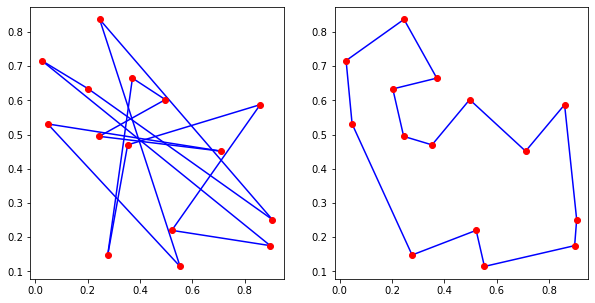

In [19]:
#importing the relevant libraries for use
import matplotlib.pyplot as plt
import numpy

#creating a class for the coordinates where I can put all my necessary functions and variables. 
class Coordinate:
    def __init__(cord,x,y): #initial coordinates of the cities. I further set a seed for it which fixes these points
        cord.x = x
        cord.y = y
        
    def distance(a,b): #calculates the distance between two points using the formula: d = [(y2-y1)**2 + (x2-x1)**2]**0.5
        return numpy.sqrt(numpy.abs(a.x-b.x) + numpy.abs(a.y-b.y))
    
    #calculates the total distance between all the cities by suming up all the distances
    def total_distance(coordinates):
        distance = 0
        for one, two in zip(coordinates[:-1], coordinates[1:]):
            distance = distance + Coordinate.distance(one, two)
        distance = distance + Coordinate.distance(coordinates[0], coordinates[-1])
        return distance

#seed = [12, 65, 345,]    
    
if __name__ == "__main__":
    coordinates = [] #creates an empty list where the coordinates can be put in 
    numpy.random.seed(345) 
    """setting the seed fixes the coordinates of the points, which means that we can change the seed to create a random 
    distribution of the points but the answer will remain the same for the specific seed every time we run it
    """
    for i in range(15): """sets a loop for the number of points (cities) needed. This means as the coordinates of every point
        are generated, they are put into the empty list to be used later"""
        coordinates.append(Coordinate(numpy.random.uniform(), numpy.random.uniform()))
    
    #plots two figures side by side to comparision of the solutions.
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    for one, two in zip(coordinates[:-1], coordinates[1:]):
        ax1.plot([one.x, two.x], [one.y, two.y], 'b')
    ax1.plot([coordinates[0].x, coordinates[-1].x], [coordinates[0].y , coordinates[-1].y], 'b')
    for c in coordinates:
        ax1.plot(c.x, c.y, 'ro')
    
    """Cost here represents the sum of the distance between the points and hence needs to be minimized. 
    Cost 0 is the initial distance claculated """
    cost0 = Coordinate.total_distance(coordinates)
    temperature = 30 #defining the initial temperature 
    factor = 0.1 #this brings down the temperature with every iteration of the loop by multiplying it with the current temperature
    t_initial = temperature
    for i in range(100):
        print(i, "cost =", cost0)
    #prints the distance as the function of the time - creates the list that can be observed below.  
        
        temperature = temperature * factor #as mentioned above, the factor is multiplied to redcue the temperature
        #lower the temperature, the less likely the program will accept a bad solution
        for j in range(500):
            r1, r2 = numpy.random.randint(0, len(coordinates), size =2)
        """here the neighbouring coordinates are exchanged to get a new solution. """
            
            temp = coordinates[r1]
            coordinates[r1] = coordinates[r2]
            coordinates[r2] = temp
        """defines the temperature at every iteration. The program uses this to narrow down the list of best 
        solution until an optimum can be reached"""
            
            cost1 = Coordinate.total_distance(coordinates) 
        """generates a new cost(distance) that is then compared with the previous one
    if the new cost is less than the previous one, the new cost becomes the current one. If the solution is worse it uses 
    probablistic acceptance depending on the temperature to accept or reject the new cost.
    """
            
            if cost1 < cost0:
                cost0 = cost1
            else:
                x = numpy.random.uniform()
                if x < numpy.exp((cost0 - cost1)/temperature):
                    cost0 = cost1
                else:
                    temp = coordinates[r1]
                    coordinates[r1] = coordinates[r2]
                    coordinates[r2] = temp
    
    for one, two in zip(coordinates[:-1], coordinates[1:]): """we zip the list of coordinates and the best paths desicded
    and plot the points"""
        ax2.plot([one.x, two.x], [one.y, two.y], 'b')
    ax2.plot([coordinates[0].x, coordinates[-1].x], [coordinates[0].y , coordinates[-1].y], 'b')
    for c in coordinates:
        ax2.plot(c.x, c.y, 'ro')
    plt.show()

## **PART 2: SIMULATION**

The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the NetLogo agent-based model in NS50 and will review it again in Week 7 of CS51. Check out the class readings to learn about this model.


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate.  If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease. 

### **Part 2.1 Numerical Modeling and Simulation**

For this part of the assignment, you’ll consider the SIR model described by the set of differential equations below, and the numerical simulation in Python via Euler’s method.

$$ \frac{dS}{dt} = -\frac{b}{N}S(t) I(t) $$
<br>
$$ \frac{dI}{dt} = \frac{b}{N}S(t)I(t) - kI(t) $$
<br>
$$ \frac{dR}{dt} = k I(t) $$
<br>

#### 2.1.1 Variables and Parameters (~250 words) [#variables] 

This section serves to set up an initial analysis of the SIR model. 
1. State the disease you selected to model.
2. Identify the relevant **variables** of the model, classify what type of variables they are, and explain what they mean in the context of your model. 
3. Explain what the relevant **parameters** ($b$ and $k$) are and how to select appropriate values for them, including the initial values. You’re encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned #estimation for any values that are difficult to justify with empirical data. Include APA citations for any external sources used. Note that you can work with population values $S$, $I$, $R$, or proportions, $S/N$, $I/N$, $R/N$, as long as you are consistent.
4. Explain what it would mean for the parameters ($b$ and $k$) to be smaller or larger. Consider what real-world factors would reduce or increase these parameters.
5. *Optional*: Modify the basic SIR model to add a layer of real-world complexity. A few ideas are listed below. Explain the key features of the extended model, including the modified differential equations and a full description and classification of any new variables and parameters following the steps above.
  - Vaccination
  - Antibiotic use and/or development of antibiotic resistance
  - Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).
  - Birth and death rates in the population

<font color='red'>**Answer 2.1.1 here**</font>

Disease: Covid-19 

Variables: 
<br>
S = 135710 
<br>
I = 54340
<br>
R = 1830
<br>
Time = in days. Starts from the day the susceptible population was measured: 8th May, 2020 in India. 

<br>
    
Classification: The S, I and R are the dependent variables and are a measure of people and hence are quantitative discrete as each individual is counted as a separate whole number. Time, the indepedent variable, in theory is quantitative continuous, but here is assumed to be discrete as it is measured in days instead of in hours, minutes and so on. In the model, we essentially divide the entire population into categories of: 
-	Susceptible (S): Individuals that have not yet been infected but can be. Is normally the entire population, excluding individuals with immunity or those that are already dead. 
S = N – I – R 
-	Infected (I): Individuals that are infected 
-	Recovered/removed (R): people that either died or recovered from the disease 

Parameters: 
- b = 0.085
- k = 0.062

<br>

Changes in parameters: b is the transmission rate of the disease, where a larger b will lead to a higher chance of an individual spreading the disease to another, given the proximity needed for transmission is met. B can change with mutations of the infection, or with precautions like social distancing, masks use of sanitizers and lockdowns.  
A smaller k, which is the recovery rate observed by infected individuals, would mean less people will recover when infected. This will still increase the value of R as lack of recovery will eventually cause them to be removed from the model. Recovery rates are also dependent on factors such medical care (plasma therapy, antibiotics), vaccinations, pre-existing health conditions and etc. 

Real-world complexity: Considering the role of vaccines in the systems and the mutations that are observed, like the recent one in UK and Africa, the parameters b and k will change throughout the progression of the pandemic. Accounting for these variations changes the way the population is divided into S, I, and R as vaccinations can decrease the number of susceptible people, moving them directly to R, but a new mutation can render those vaccines useless. And depending on the mutation, a certain percentage of the recovered (which we do not know before hand) can become susceptible again. 


#### 2.1.2 Euler’s Method Description (~150 words) [#algorithms]

Explain what it means to solve the SIR differential equations and how Euler’s method works as an algorithm to achieve a numerical solution via simulation. In your explanation, identify whether the model and simulation are continuous or discrete, and consider the role of the step size (`h`) in the algorithm.

<font color='red'>**Answer 2.1.2 here**</font>

The SIR model can be solved using differential equations; however, it can be very difficult to find analytical solutions to differential equations as they require values of S, I and R to be calculated at every point in the function. Therefore, we use a numerical approach to solve the SIR model by using Euler’s method to simulate the function. Euler’s method approximates the solution of the function by repeatedly finding the tangent slope at every point in the curve. 
As the model uses differential equations, the solutions are obtained in the form of functions, which give us continuous answers that are eventually rounded off. The simulation however, gives us discrete solutions as it uses Euler’s method, which essentially finds the slope of the function at every point. The smaller the step size it assumes, the more points it covers in a given domain and hence is more sensitive to small changes in the function, providing more accurate results


#### 2.1.3 Euler’s Method Implementation [#algorithms, #dataviz]

Implement a numerical simulation to derive the implications of your model using Euler’s method in Python.Your simulation must generate at least one relevant visualization of the disease dynamics, including a descriptive figure legend and caption. You may need to adjust the run-time and step size in your simulation to ensure the visualization is maximally informative. Include thorough comments in your code to convey your understanding of the implementation of Euler’s method. 

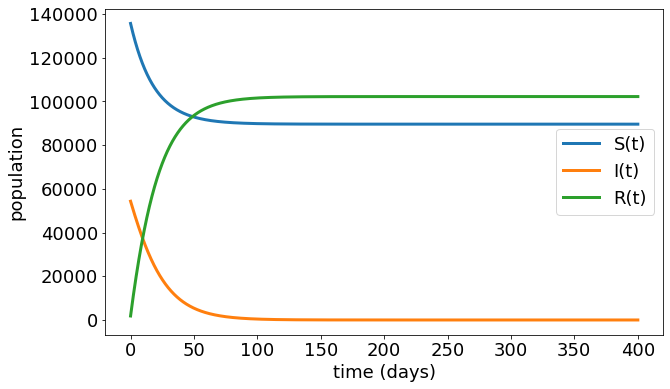

In [9]:
# Add your Numerical Simulation here!

### This code has been adapted from the code in CS51 session 7.2

import numpy as np #imports numpy package as np for defining variables

t_start = 0 # Stores the initial state of the system for later use. Here the date starts from  
t_end = 400 #setting for how long the simulation is supposed to run.


step_size = 0.01 #Stores the step size which is used to map out the discrete steps
#for employing the Euler's method to approximate towards the correct solution
steps = int((t_end - t_start)/step_size + 1) 
#stores the number of steps and converts it to an integer value
#after performing calculations by dividing the time taken by step size

# defining variables of the equations
t = np.linspace(t_start, t_end, steps) # storing the value of t
S = np.zeros(steps) # for storing the Susceptible people value
I = np.zeros(steps) # for storing the Infected people value
R = np.zeros(steps) # for storing the Recovered people value 

# defining the infection and recovery rate parameters for the equations
b = 0.065 #defines the rate of the infection
k = 0.082 #defines the rate of recovery

def dSdt(t,S,I,R):
    return  -b* S * I/N #returns the differential equation for dS/dt
def dIdt(t,S,I,R):
    return b/N * S * I - k * I #returns the differential equation for dI/dt
def dRdt(t,S,I,R):
    return k * I #returns the differential equation dR/dt

# initial conditions:
S[0] = 135710  #saves the initial state of the susceptible population
I[0] = 54340 #saves the initial state of the infected population
R[0] = 1830 #represents the initial state of the removed/recovered population
N = S[0] + I[0] + R[0] # represents the total population

for n in range(steps-1): # range(start, stop, step)
    S[n+1] = S[n] + step_size * dSdt(t[n], S[n], I[n], R[n]) 
#using euler's method to approximate the next point on the line for susceptible population
    I[n+1] = I[n] + step_size * dIdt(t[n], S[n], I[n], R[n])
#using euler's method to approximate the next point on the line for infected population
    R[n+1] = R[n] + step_size * dRdt(t[n], S[n], I[n], R[n]) 
#using euler's method to approximate the next point on the line for recovered/removed population

import matplotlib.pyplot as plt 
#imports the matplotlib library as plt
plt.rcParams.update({'font.size': 18}) #sets the fontsize
plt.rcParams["figure.figsize"] = [10,6] #sets the figure size
plt.plot(t,S,linewidth=3,label='S(t)') 
plt.plot(t,I,linewidth=3,label='I(t)') 
plt.plot(t,R,linewidth=3,label='R(t)') 
#plotting the lines for all the differential equations
plt.xlabel('time (days)') #sets the x-axis label
plt.ylabel('population') #sets the y-axis label
plt.legend(loc='best')
plt.show() #shows the plotted figure

#### 2.1.4 Results and Interpretation (~250 words) [#modeling, #dataviz]

- Interpret the results of the numerical simulation by making reference the output in the visualization(s). To fully interpret the results, you should run the simulation multiple times with varying parameter inputs (b and k) and observe the behavior of your model. Does the behavior align with what you would expect these adjustments to have in reality (given your answer to 1.4 above)?  

- Explain how useful this model is by considering the following guiding questions: What insights can be gained? How closely do the results match what you’d expect in reality? What are the most notable assumptions of this model and what impact do they have on its usefulness?


<font color='red'>**Answer 2.1.4 here**</font>

The simulation shows the interaction between the three variables within the close system of the value we set initially. As the susceptible and infected population decreases over time, the recovered increases exponentially, approaching a constant after a steep initial slope. This inaccurately models the system as the population is shown to stay the same, which it will not as children are born or the population decreases naturally. Even with different values of the parameters b and k, the simulation shows a similar behavior, just with variations in the initial slope. R always increases while I and S decrease, however, if k, the recovery rate, is larger than b, the transmission rate, then the curve of the susceptible individuals stays above the curve of the recovered population. 

We can understand from this model that in order to control pandemics, we need to reduce b by limiting the contact between susceptible and infected individuals. 
However, this model is not representative of the real-world phenomenon as it fails to capture the complexities of how b and k change because of health care provided or the random mutations that we have recently observed in the world.
  

### **Part 2.2 Agent-Based Modeling and Simulation**

For this part of the assignment, you’ll consider an agent-based model to describe the spread of disease and an agent-based simulation implemented in [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus). Explore the model thoroughly and run it multiple times with different parameter settings.

Note about parameters: this model uses similar variables and parameters as the one above, but the parameters are not defined identically. In particular, the "Infectiousness" parameter in NetLogo is analogous to, but not equivalent to the infection rate in the SIR model. Thus, they should not be set to the same value in both of your simulations. The infection rate in the SIR model already incorporates the interaction rate of individuals, while the NetLogo simulation sets that rate separately. In other words, the "infectiousness" parameter in NetLogo only dictates the probability of infecting someone if they come close enough, but does not take into account how frequent those interactions occur. Be sure to investigate the meaning of the other parameters as well so that you understand how to set them appropriately.
<br>

#### 2.2.1 Simulation Comparison (~250 words) [#modeling]

After fully exploring the model and running multiple simulations, summarize how it compares to your simulation above. Address the following points:

- Identify the main similarities between the Python SIR simulation and the NetLogo simulation.

- Identify the major differences between the Python SIR simulation and the NetLogo simulation.

- Identify one advantage of the Python SIR simulation over the NetLogo simulation. 

- Identify one advantage of the NetLogo simulation over the Python SIR simulation.

- Based on the results of the simulations, which one do you believe is a more realistic representation of nature? Justify your reasoning.



<font color='red'>**Answer 2.2.1 here**</font>

The differences between the python simulation and Netlogo simulation is that python simulation is a deterministic mathematical model which gives the same output for the given input. Netlogo simulation however, is a stochastic model that relies on certain random behaviors built within the algorithm and hence gives a different output each time it is run.

Python (advantages): gives exact answers, which means if we have good initial data then there is certainty in the quality of the output received. 
Netlogo (advantages): is a better representation of the randomness that naturally exists in the real world and hence maps the emergence of unexcepted behaviors that are inherent in the complex systems such as spread of a pandemic. These insights cannot be gauged by deterministic mathematical models. 

In conclusion, the Netlogo model is a better representation of the real world complexities whereas the SIR python model, though gives us exact answers, is a mere simplification of the world and fails to account for many other variables inherent in complex systems.


#### 2.2.2 *Optional*: Your own agent-based simulation [#algorithms, #modeling]:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). Your work needs to be explained in sufficient detail, including citations to any external sources consulted, in order to receive credit.

- One option: a tree graph can be useful in modeling person-to-person interactions. 

- Another option: turtles. 


In [ ]:
Reference for the code below: 
    
    Farrell, D. (n.d.).GitHub. Retrieved March 9, 2021, from https://github.com/dmnfarrell/teaching/blob/master/SIR_modelling/network_model_SIR.ipynb

In [ ]:
# Add code to complete the optional implementation 
# Add more cells as needed
import time, enum, math
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector

import networkx as nx
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, GeoJSONDataSource, ColorBar, HoverTool, Legend, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.models.glyphs import Line
from bokeh.palettes import Category10, Viridis
output_notebook()

In [ ]:
class State(enum.IntEnum):
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2
class MyAgent(Agent):
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = int(self.random.normalvariate(20,40))
        self.state = State.SUSCEPTIBLE  
        self.infection_time = 0

    def move(self):
        """Move the agent"""

        possible_steps = [
            node
            for node in self.model.grid.get_neighbors(self.pos, include_center=False)
            if self.model.grid.is_cell_empty(node)
        ]
        if len(possible_steps) > 0:
            new_position = self.random.choice(possible_steps)                 
            self.model.grid.move_agent(self, new_position)

    def status(self):
        """Check infection status"""
        
        if self.state == State.INFECTED:     
            drate = self.model.death_rate
            alive = np.random.choice([0,1], p=[drate,1-drate])
            if alive == 0:
                self.model.schedule.remove(self)            
            t = self.model.schedule.time-self.infection_time
            if t >= self.recovery_time:          
                self.state = State.REMOVED
            #print (self.model.schedule.time,self.recovery_time,t)

    def contact(self):
        """Find close contacts and infect"""
        
        neighbors_nodes = self.model.grid.get_neighbors(self.pos, include_center=False)
        susceptible_neighbors = [
            agent
            for agent in self.model.grid.get_cell_list_contents(neighbors_nodes)
            if agent.state is State.SUSCEPTIBLE
        ]
        for a in susceptible_neighbors:
            if self.random.random() < model.ptrans:
                a.state = State.INFECTED
                a.recovery_time = model.get_recovery_time()
                                
    def step(self):
        self.status()
        self.move()
        self.contact()
        
    def toJSON(self):        
        d = self.unique_id
        return json.dumps(d, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)

In [ ]:
class NetworkInfectionModel(Model):
    """A model for infection spread."""
    
    def __init__(self, N=10, ptrans=0.5, avg_node_degree=3,
                 progression_period=3, progression_sd=2, death_rate=0.0193, recovery_days=21,
                 recovery_sd=7):
        
        #self.num_agents = N
        self.num_nodes = N  
        prob = avg_node_degree / self.num_nodes
        
        self.initial_outbreak_size = 1
        self.recovery_days = recovery_days
        self.recovery_sd = recovery_sd
        self.ptrans = ptrans
        self.death_rate = death_rate
        
        self.G = nx.erdos_renyi_graph(n=self.num_nodes, p=prob)
        self.grid = NetworkGrid(self.G)
        
        self.schedule = RandomActivation(self)
        self.running = True
        #self.dead_agents = []
        
        # Create agents
        for i, node in enumerate(self.G.nodes()):
            a = MyAgent(i+1, self)
            self.schedule.add(a)
            #add agent
            self.grid.place_agent(a, node)

            #make some agents infected at start
            infected = np.random.choice([0,1], p=[0.99,0.01])
            if infected == 1:
                a.state = State.INFECTED
                a.recovery_time = self.get_recovery_time()
            
        self.datacollector = DataCollector(
            agent_reporters={"State": "state"})

    def get_recovery_time(self):
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd))
    
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = ListedColormap(["lightblue", "orange", "green",])

def plot_grid(model,fig,layout='spring',title=''):
    graph = model.G
    if layout == 'kamada-kawai':      
        pos = nx.kamada_kawai_layout(graph)  
    elif layout == 'circular':
        pos = nx.circular_layout(graph)
    else:
        pos = nx.spring_layout(graph, iterations=5, seed=8)  
    plt.clf()
    ax=fig.add_subplot()
    states = [int(i.state) for i in model.grid.get_all_cell_contents()]

    #cells = [(i.pos,int(i.state)) for i in model.grid.get_all_cell_contents()]
    #print (cells[:10])
    #print (pos)
    #print (pd.Series(states).value_counts())
    colors = [cmap(i) for i in states]
    
    nx.draw(graph, pos, node_size=80, edge_color='gray', node_color=colors, #with_labels=True,
            alpha=0.9,font_size=14,ax=ax)
    #print (ax.patches)
    #ax.legend(['S','I','R'])
    ax.set_title(title)
    return

fig,ax=plt.subplots(1,1,figsize=(16,10))
model = NetworkInfectionModel(200, ptrans=0.1)
model.step();model.step()
f=plot_grid(model,fig,layout='kamada-kawai')
plt.savefig('abm_networkgrid.jpg')

## **REFLECTION**

In less than 100 words, explain how this unit has enhanced your view of the power of modeling, algorithms, and simulations to describe the natural world around you. 

<font color='red'>**Add your reflection here**</font>

This unit has helped me understand different ways of thinking that are represented by algorithms such as genetic algorithm, brtue force or greedy algorithm. Their way of solving problems helped me understand how to approach real problems and find their solution efficeintly. 
Furhtermore, modeling and simulation revealed themselves to be interesting tools of understand and predicting real problems such as spread of pandemics in a way that accounts for several variables at once. However, in the end they are mere simplications and hence should only be used for general direction along with other methods of understanding complex phenomena. 

## You're done! 

You must upload TWO files:


1. A **PDF** of your entire assignment. This is to be submitted as a separate file, NOT simply inside the zipped folder. Email attachments will not be accepted. We encourage students to follow the tips available in [this guide](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit?usp=sharing), especially the best practices listed at the end.


2. A **zipped folder** containing the .ipynb file and any other relevant files for running the notebook.